# Loading packages

In [1]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [2]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,3.783199e+07,1.711147e+07,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4.669179e+06,9.278377e+05,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,2.810119e+07,1.111696e+07,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8.238474e+06,7.519183e+06,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,3.546565e+07,8.545184e+06,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80
5,C_494,0,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,...,NaN,7.953387e+04,8.484770e+04,8.061511e+04,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00
6,C_300,0,GmbH,10969,68200,1991,2.0,GKV,1.508435e+08,1.479894e+08,...,NaN,6.657375e+08,8.479909e+07,3.142807e+07,11542490.91,326731.07,8000.0,4.007555e+07,-8.337054e+06,-34594274.52
7,C_453,0,GmbH,16792,78100,1991,NaN,GKV,2.843420e+08,2.843420e+08,...,NaN,2.883814e+09,4.229090e+08,4.312550e+08,21696000.00,448000.00,NaN,5.861770e+08,-7.339750e+08,-95826000.00
8,C_924,0,GmbH,13125,86101,1991,283.0,GKV,9.811591e+06,9.681040e+06,...,NaN,2.032968e+07,7.366730e+06,5.421665e+06,322573.88,372298.68,NaN,4.369386e+05,-1.879056e+06,-13729379.17
9,C_976,0,GmbH,12681,71122,1999,NaN,GKV,1.384595e+05,1.384595e+05,...,NaN,1.552805e+06,4.966969e+05,4.500943e+04,35726.57,NaN,NaN,1.947540e+05,3.318306e+05,-798859.83


# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [3]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [4]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing']

## Missing values

Overview of missing values in the data

In [5]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          669
bonds_payables_lt          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
sales                        1
earn_from_op                 1
cf_financing                 1
annual_profit                1
total_assets                 1
cf_investment                1
current_assets               1
cf_operating                 1
sector                       0
zip_code                     0
legal_form                   0
default                      0
year_inc

In [6]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

In [7]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

### Age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

\begin{equation*}
Age = Todays\ Year - Year\ Inc.
\end{equation*}

In [8]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

#For the test data
df_test['age_num'] = datetime.datetime.now().year - df_test["year_inc"]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [9]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

# For the test data
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_test["age_num"].quantile(i/100))

age_th = df_test["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_test.loc[df_test["age_num"] > age_th,"age_num"] = age_th

In [10]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(9.999, 13.0]","(13.0, 16.0]","(16.0, 20.0]","(20.0, 23.0]","(23.0, 25.0]","(25.0, 29.0]","(29.0, 32.0]","(32.0, 42.6]","(42.6, 66.0]","(66.0, 158.33]"
default,,,,,,,,,,
0,69,61,75,78,36,67,63,54,65,62
1,5,1,3,6,4,0,7,5,3,4


In [11]:
#Flave - habe age cat so transformiert, dass man sie unten in der regression benutzen kann
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 4, inclusive=True),
     df_train['age_num'].between(5, 9, inclusive=True),
     df_train['age_num'].between(10, 29, inclusive=True),
     df_train['age_num'].between(30, np.inf, inclusive=True)], 
    [1,2,3,4])

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,3,4
default,,
0,386,244
1,19,19


### Cash

In [12]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.5))
df_train['cash'] = sci.stats.mstats.winsorize(df_train['cash'], limits =[0.0, 0.015])
#df_train['cash'] = np.log(df_train['cash'])
# print(df_train['cash'].isnull().sum())
# print(df_train['cash'].describe())
# print(df_train['cash'].value_counts())
# plt.boxplot(df_train['cash'])
# plt.show()

#Same procedure for test
df_test['cash'] = df_test['cash'].replace(np.nan, np.quantile(df_test['cash'].dropna(),.5))
df_test['cash'] = sci.stats.mstats.winsorize(df_test['cash'], limits =[0.0, 0.015])

### Working Capital Ratio
liquidity ratios measuring a companies ability to meet its short term dept obligations

\begin{equation*}
Working\ Capital\ Ratio = \frac{Current\ Assets}{Current\ Liabilities}
\end{equation*}


In [13]:
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.02])

#Same procedure for test
df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
df_test['wc_ratio'] = sci.stats.mstats.winsorize(df_test['wc_ratio'], limits =[0, 0.02])
# print(df_train.wc_ratio)
# print(df_train.wc_ratio.describe())

### Ebit Margin

\begin{equation*}
EBIT\ Margin = \frac{EBIT}{Sales}
\end{equation*}


In [14]:
df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])
# print(df_train['profit_margin'].isnull().sum())
# print(df_train['profit_margin'].describe())
# print(df_train['profit_margin'].value_counts())
df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']
df_test['ebit_margin'] = sci.stats.mstats.winsorize(df_test['ebit_margin'], limits =[0.02, 0.01])

### Operating Cashflow Ratio 


\begin{equation*}
Operating\ Cashflow\ Ratio = \frac{Operating\ Cashflow}{Sales}
\end{equation*}


In [15]:
cf_pos = np.where(df_train['cf_operating'] > 1, df_train['cf_operating'], 0)
cf_neg = np.where(df_train['cf_operating'] < -1, df_train['cf_operating'], 0)
df_train['ocf_ratio'] = df_train['cf_operating']/df_train['sales']
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.01, 0.02])
# print(df_train.ocf_ratio)
# print(df_train.ocf_ratio.describe())
# print(df_train['ocf_ratio'].value_counts())
df_test['ocf_ratio'] = df_test['cf_operating']/df_test['sales']
df_test['ocf_ratio'] = sci.stats.mstats.winsorize(df_test['ocf_ratio'], limits =[0.01, 0.02])

### Profit Margin

\begin{equation*}
Profit\ Margin = \frac{Gross\ Profit}{Sales}
\end{equation*}


In [16]:
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.02])
# print(df_train['profit_margin'].isnull().sum())
# print(df_train['profit_margin'].describe())
# print(df_train['profit_margin'].value_counts())
df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.5))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']
df_test['profit_margin'] = sci.stats.mstats.winsorize(df_test['profit_margin'], limits =[0.0, 0.02])

### Equity Ratio 
First predict NaN's for total equity

In [17]:
# Check for correlation to get relevant variables for regression
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))

cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

# Split training and prediction dataset
y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

#Train model to fit dataset and predict missing values from column total equity and replace them
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

# Replace the missing values with predicted values
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred
# print(df_train['total_equity'].isnull().sum())
# print(df_train['total_equity'].describe())
# print(df_train['total_equity'].value_counts())

corr total eqity x total result: 0.8677428854384167
corr total eqity x total assets: 0.7973909460204517
corr total eqity x operating cash flow: 0.8165188337701584
[ 804154.57039482  826770.37433689  750108.4400077  2034060.76386615
  906958.71620786  757800.9886018   694739.75133316  777633.44217636
 1031927.82907442  707250.9930617   798206.66922868  753555.95951813
  938481.58223853  838818.88678533  728338.08877873  658229.22939662
  757045.94589862 3707034.78681171  430054.79880166  809294.10299164]


\begin{equation*}
Equity\ Ratio = \frac{Total\ Equity}{Total\ Assets}
\end{equation*}


In [18]:
df_train['equity_ratio'] = np.where(df_train['total_equity'] > 1, df_train['total_equity']/df_train['total_assets'], 0)
df_train['equity_ratio'] = sci.stats.mstats.winsorize(df_train['equity_ratio'], limits =[0.0, 0.02])
# print(df_train.equity_ratio)
# print(df_train.equity_ratio.describe())
# print(df_train.equity_ratio.value_counts())
df_test['equity_ratio'] = np.where(df_test['total_equity'] > 1, df_test['total_equity']/df_test['total_assets'], 0)

### Debt-to-Equity Ratio  


\begin{equation*}
Debt-to-Equity\ Ratio = \frac{Total\ Debt}{Total\ Equity}
\end{equation*}


In [19]:
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])
# df_train['debt_to_equity'] = np.where(df_train['debt_to_equity'] > 0, np.log(df_train['debt_to_equity']), 0)

# print(df_train.debt_to_equity.describe())
# print(df_train.debt_to_equity)
# print(df_train.debt_to_equity.value_counts())
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']
df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

### Return on Assets

\begin{equation*}
ROA = \frac{Annual\ Profit}{Total\ Assets}
\end{equation*}


In [20]:
df_train['roa'] = df_train['annual_profit']/df_train['total_assets']
df_test['roa'] = df_test['annual_profit']/df_test['total_assets']

### Boxplots for Ratios

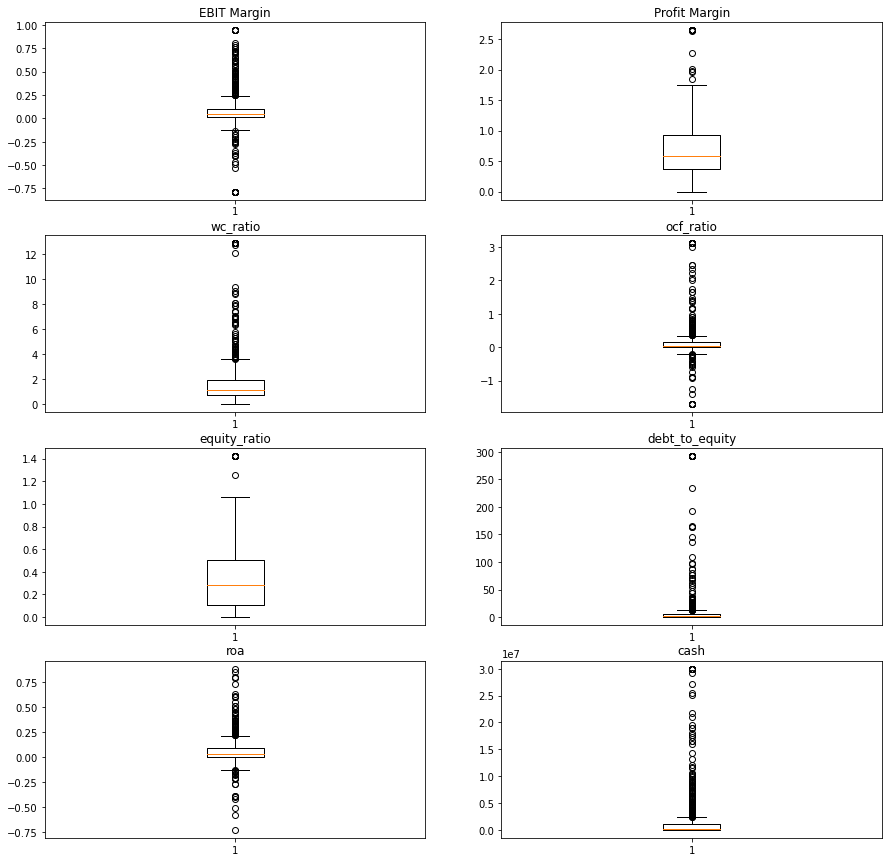

In [21]:
f, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0,0].boxplot(df_train['ebit_margin'])
ax[0,0].set_title('EBIT Margin')
ax[0,1].boxplot(df_train['profit_margin'])
ax[0,1].set_title('Profit Margin')
ax[1,0].boxplot(df_train['wc_ratio'])
ax[1,0].set_title('wc_ratio')
ax[1,1].boxplot(df_train['ocf_ratio'])
ax[1,1].set_title('ocf_ratio')
ax[2,0].boxplot(df_train['equity_ratio'])
ax[2,0].set_title('equity_ratio')
ax[2,1].boxplot(df_train['debt_to_equity'])
ax[2,1].set_title('debt_to_equity')
ax[3,0].boxplot(df_train['roa'])
ax[3,0].set_title('roa')
ax[3,1].boxplot(df_train['cash'])
ax[3,1].set_title('cash')
plt.show()

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [22]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        #print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

In [23]:
dictionary_logit = pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")
dictionary_logit

,P-Value,NAs
cash,0.037583,0
year_inc,0.055778,0
total_equity,0.084170,0
wc_ratio,0.085508,0
profit_margin,0.143273,0
gross_profit,0.157463,0
age_cat,0.170428,0
roa,0.220524,0
cf_operating,0.242346,1
bank_liabilities_lt,0.245019,544


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [24]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue


In [25]:
dictionary_mannu = pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")
dictionary_mannu

,Test statistic,P-Value,NAs
cash,7387.0,0.000036,0
total_equity,8078.0,0.000378,0
trade_receivables_lt,8295.0,0.000735,644
trade_payables_lt,8433.0,0.001102,664
bonds_payables_lt,8470.0,0.001226,668
bonds_payables_st,8470.0,0.001226,668
monetary_current_assets,8691.0,0.002271,0
bonds_payables_mt,8853.0,0.003492,663
equity_ratio,8901.5,0.003953,0
result_from_ord_bus,8910.0,0.004045,0


In [26]:
#merge both results together
summary = pd.concat((dictionary_logit.iloc[:,0],dictionary_mannu.iloc[:,1:]),axis=1,)
summary.columns = ["P-Value Univ. Logit","P-Value MannU","NAs"]
summary

,P-Value Univ. Logit,P-Value MannU,NAs
cash,0.037583,0.000036,0
year_inc,0.055778,0.255359,0
total_equity,0.084170,0.000378,0
wc_ratio,0.085508,0.009051,0
profit_margin,0.143273,0.070283,0
gross_profit,0.157463,0.011038,0
age_cat,0.170428,0.083892,0
roa,0.220524,0.210278,0
cf_operating,0.242346,0.006266,1
bank_liabilities_lt,0.245019,0.073125,544


### Categorical Variables

In [27]:
catvar = [i for i in list(df_train.columns)[1:] if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.24  11.76       15       2   17    2.54
OHG                      100.00   0.00        4       0    4    0.60
KG                        80.00  20.00        4       1    5    0.75
GmbH & Co. KG             91.67   8.33       88       8   96   14.37
GmbH                      95.04   4.96      460      24  484   72.46
Genossenschaft           100.00   0.00       15       0   15    2.25
Freiberufler              80.00  20.00        4       1    5    0.75
Einzelfirma               88.89  11.11        8       1    9    1.35
BGB-Gesellschaft         100.00   0.00        4       0    4    0.60
AG                        96.43   3.57       27       1   28    4.19

Variable:  type_pl
---------

# Our Variables of interest
In this section we want to focus on our variables of interest, which are mainly choosen because of economic reasoning. These are:

- Age
- Cash
- Profit Margin
- EBIT Margin
- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt-to-Equity Ratio
- Return on Assets

## Results of both univariate Tests

As already stated before, economic reasoning is our main argument to choose a variable for our regression. Nevertheless it is important to see the results of the univariate tests in the section before.

In [28]:
col_list = ["age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
summary.loc[col_list,:]

,P-Value Univ. Logit,P-Value MannU,NAs
age_num,0.721892,0.256055,0
cash,0.037583,0.000036,0
profit_margin,0.143273,0.070283,0
ebit_margin,0.567159,0.284780,0
wc_ratio,0.085508,0.009051,0
ocf_ratio,0.444895,0.336994,0
equity_ratio,0.544274,0.003953,0
debt_to_equity,0.691734,0.199307,0
roa,0.220524,0.210278,0


## Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset.

In [29]:
col_list = ["default","age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_num,cash,profit_margin,ebit_margin,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0,121.0,10297047.50,0.361114,0.061157,5.142587,0.065368,0.738567,0.352444,1.494000e-01
1,0,45.0,926383.75,1.104725,0.027363,0.663710,-1.713468,0.389698,1.560542,9.655827e-02
2,0,59.0,9146283.79,2.640070,0.023240,3.328108,2.471134,0.000937,163.778649,-2.540307e-17
3,0,49.0,6890565.23,2.640070,0.133260,3.193566,0.391307,0.592532,0.236311,2.980723e-02
4,0,113.0,5036615.09,1.135876,0.489225,0.102055,1.178664,0.417496,1.329259,2.607926e-02
...,...,...,...,...,...,...,...,...,...,...
664,0,44.0,31000.00,0.506472,0.013336,0.835583,0.009571,0.182336,4.484386,-2.783753e-03
665,0,21.0,252537.31,0.446851,0.047281,1.213142,-0.083731,0.341823,1.925494,1.555806e-01
666,0,21.0,573037.66,1.000000,0.298976,0.041927,0.032679,0.000000,0.000000,1.289209e-02
667,0,14.0,5652.17,1.049012,0.053456,0.615002,0.137266,0.000000,0.000000,6.375280e-02


### Age

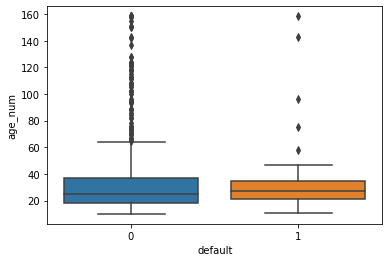

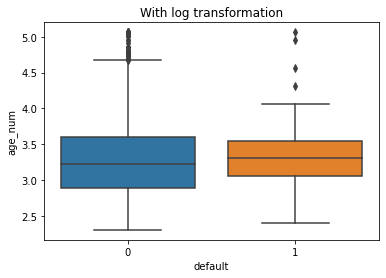

<Figure size 432x288 with 0 Axes>

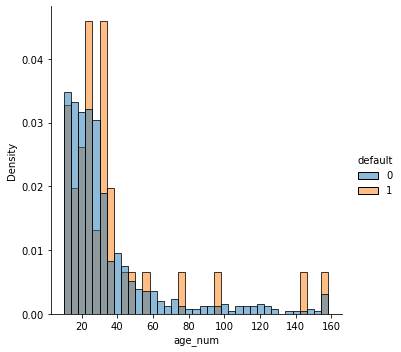

In [30]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

### Cash

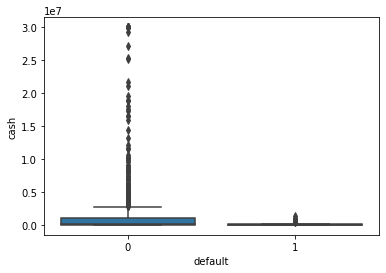

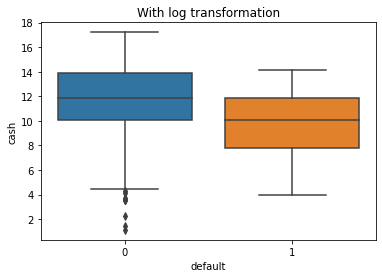

<Figure size 432x288 with 0 Axes>

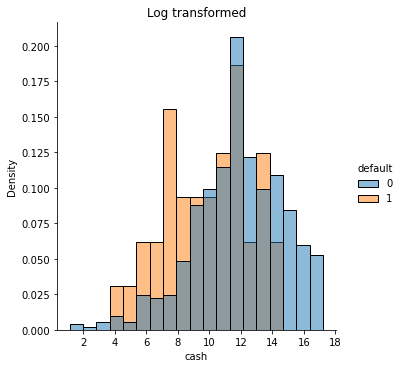

In [31]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x=np.log(df_train["cash"]),hue="default",stat="density",common_norm=False)
plt.title("Log transformed");

### Profit Margin

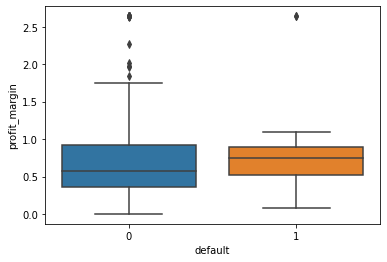

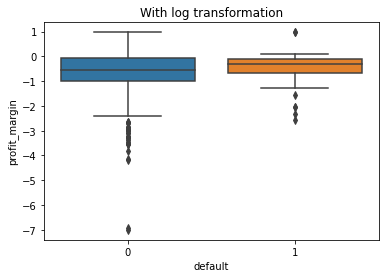

<Figure size 432x288 with 0 Axes>

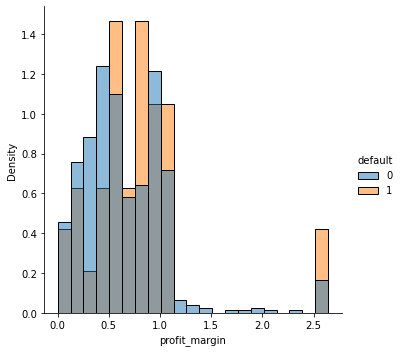

In [32]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

### Ebit Margin

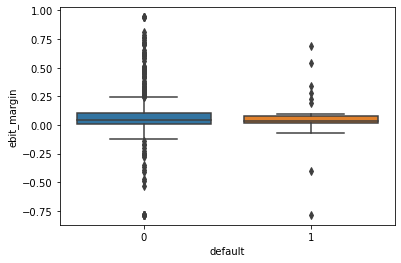

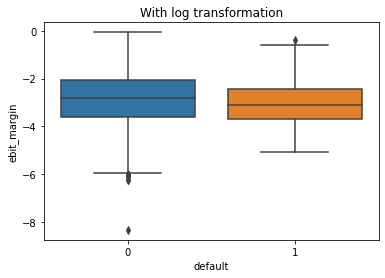

<Figure size 432x288 with 0 Axes>

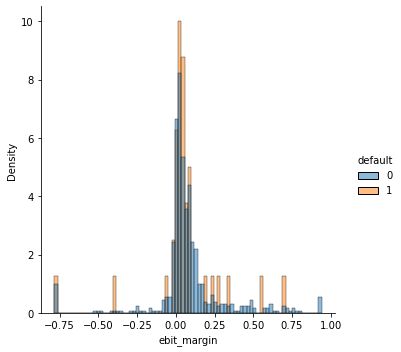

In [33]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

### Working Capital Ratio

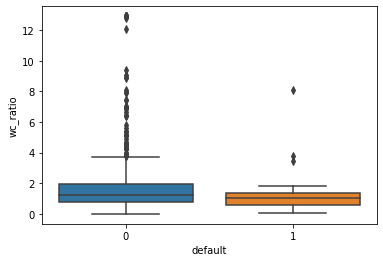

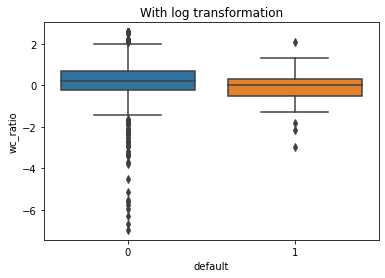

<Figure size 432x288 with 0 Axes>

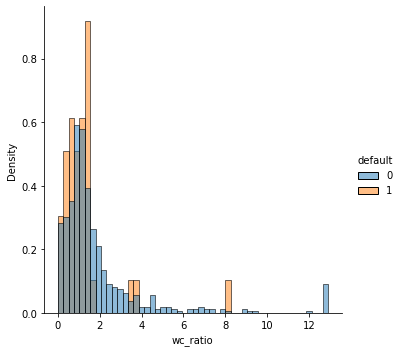

In [34]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

### Operating Cash Flow Ratio

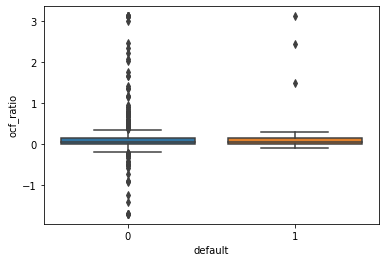

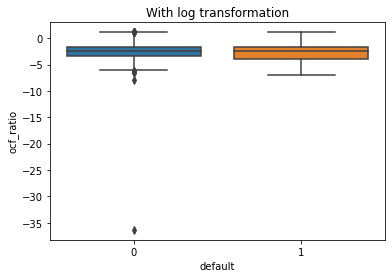

<Figure size 432x288 with 0 Axes>

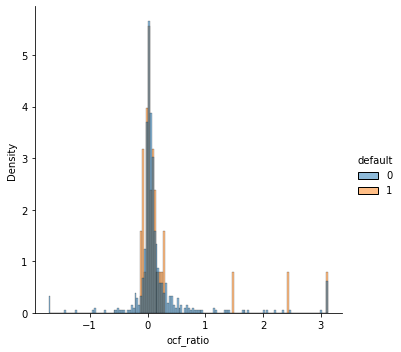

In [35]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

### Equity Ratio 

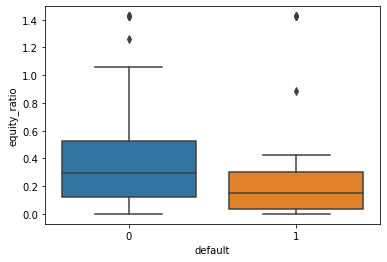

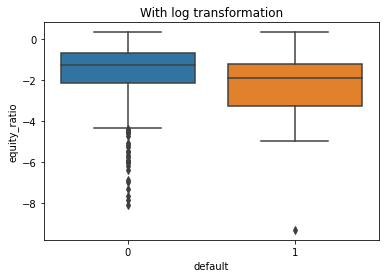

<Figure size 432x288 with 0 Axes>

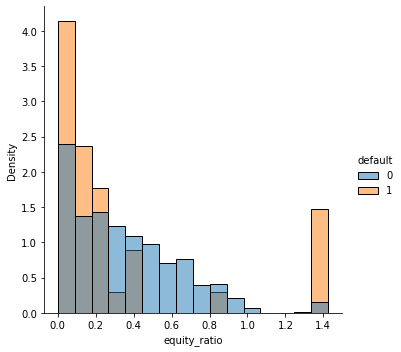

In [36]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

### Debt-to-Equity Ratio

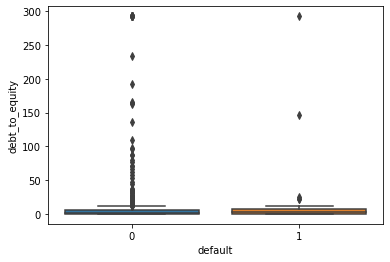

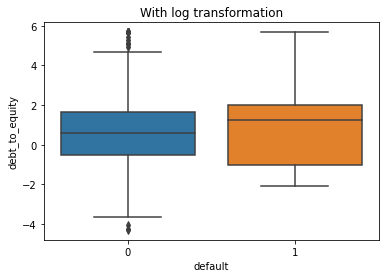

<Figure size 432x288 with 0 Axes>

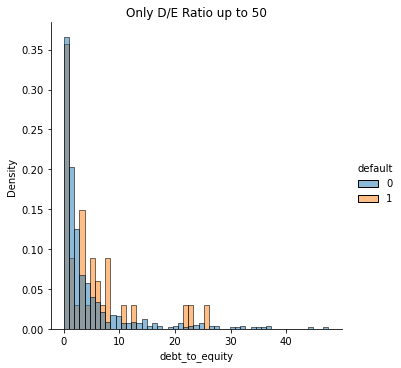

In [37]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
data = df_train[df_train["debt_to_equity"] < 50]
sns.displot(data,x="debt_to_equity",hue="default",stat="density",common_norm=False)
plt.title("Only D/E Ratio up to 50");

## Multivariate Analysis - Correlation Matrix/Heatmap

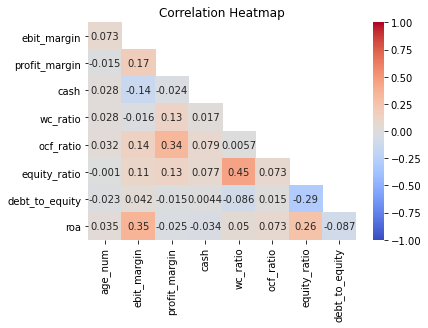

,age_num,ebit_margin,profit_margin,cash,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity
ebit_margin,0.073199,1.000000,0.174436,-0.138188,-0.016350,0.144134,0.109361,0.041610
profit_margin,-0.015169,0.174436,1.000000,-0.023509,0.127968,0.337587,0.131763,-0.015116
cash,0.028085,-0.138188,-0.023509,1.000000,0.017219,0.078503,0.076800,0.004397
wc_ratio,0.028088,-0.016350,0.127968,0.017219,1.000000,0.005698,0.446454,-0.086427
ocf_ratio,0.032462,0.144134,0.337587,0.078503,0.005698,1.000000,0.073305,0.014827
equity_ratio,-0.001019,0.109361,0.131763,0.076800,0.446454,0.073305,1.000000,-0.293038
debt_to_equity,-0.022834,0.041610,-0.015116,0.004397,-0.086427,0.014827,-0.293038,1.000000
roa,0.034984,0.353960,-0.024992,-0.034476,0.050424,0.073164,0.260223,-0.086948


In [38]:
col = ['age_num','ebit_margin', 'profit_margin', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']
data = df_train[col]
#print(data.head(10))
#print(data.info())

df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = pd.DataFrame(df_corr.iloc[1:,:-1].copy())

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

corr

## Univariate Ginis of our Variables of interest
Here we want to calculate the Gini coefficients, resulting from a logit model with only one variable of our interest. 

In [41]:
col_list = ["default","age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_num,cash,profit_margin,ebit_margin,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0,121.0,10297047.50,0.361114,0.061157,5.142587,0.065368,0.738567,0.352444,1.494000e-01
1,0,45.0,926383.75,1.104725,0.027363,0.663710,-1.713468,0.389698,1.560542,9.655827e-02
2,0,59.0,9146283.79,2.640070,0.023240,3.328108,2.471134,0.000937,163.778649,-2.540307e-17
3,0,49.0,6890565.23,2.640070,0.133260,3.193566,0.391307,0.592532,0.236311,2.980723e-02
4,0,113.0,5036615.09,1.135876,0.489225,0.102055,1.178664,0.417496,1.329259,2.607926e-02
...,...,...,...,...,...,...,...,...,...,...
664,0,44.0,31000.00,0.506472,0.013336,0.835583,0.009571,0.182336,4.484386,-2.783753e-03
665,0,21.0,252537.31,0.446851,0.047281,1.213142,-0.083731,0.341823,1.925494,1.555806e-01
666,0,21.0,573037.66,1.000000,0.298976,0.041927,0.032679,0.000000,0.000000,1.289209e-02
667,0,14.0,5652.17,1.049012,0.053456,0.615002,0.137266,0.000000,0.000000,6.375280e-02


In [42]:
dictionary_univ_gini = dict()
for var in col_list[1:]:
    X = df_train[var]
    y = df_train["default"]
    X = sm.add_constant(X)

    random_numbers = np.random.randint(0,1000000,1000)

    for i in random_numbers:
        try:
            # Splitting data into training and testing sets.
            train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
            # The splited Logit Model
            mdl2split = sm.Logit(train_labels,train_features).fit()
            mdl2split.summary2()

            # Predict the test data
            predictions_split = mdl2split.predict(test_features)
            # Predict the training data
            predictions_split_train = mdl2split.predict(train_features)
            # Calculate the absolute errors
            errors = abs(predictions_split - test_labels)
    
            #AUC & Gini Graph + Calculations of splitted logit

            fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
            auc_split = metrics.auc(fpr_split, tpr_split) 

            # Predict the in sample (train) data for comparision
            fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
            auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
            #Store values in dictionary
            dictionary_univ_gini[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1,var
        
        except:
            continue

dictionary_univ_gini = pd.DataFrame.from_dict(dictionary_univ_gini,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample","Variable"])

;

Optimization terminated successfully.
         Current function value: 0.214585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214282
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215194
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214880
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215564
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215592
  

Optimization terminated successfully.
         Current function value: 0.214485
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215499
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215366
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215066
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215052
  

Optimization terminated successfully.
         Current function value: 0.215295
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215339
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215535
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215526
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215388
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214265
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215228
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214602
  

Optimization terminated successfully.
         Current function value: 0.215579
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215424
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215404
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215404
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215462
  

Optimization terminated successfully.
         Current function value: 0.215318
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213861
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214926
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215338
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213358
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215376
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215016
  

Optimization terminated successfully.
         Current function value: 0.215487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215061
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214514
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214815
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215436
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214042
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215586
  

Optimization terminated successfully.
         Current function value: 0.215317
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215337
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215010
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214597
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214561
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214912
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215338
  

Optimization terminated successfully.
         Current function value: 0.215610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214092
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215498
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215144
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214633
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215555
  

Optimization terminated successfully.
         Current function value: 0.215480
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213105
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215415
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215464
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214470
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215321
  

Optimization terminated successfully.
         Current function value: 0.214865
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215159
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215571
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215448
  

Optimization terminated successfully.
         Current function value: 0.214512
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213947
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214984
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215578
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214938
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215412
  

Optimization terminated successfully.
         Current function value: 0.215318
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215598
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215205
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215250
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214959
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215113
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215365
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215613
  

Optimization terminated successfully.
         Current function value: 0.206069
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.205400
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202751
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201728
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202916
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204716
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204134
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201450
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202592
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.204562
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198484
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.201812
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202079
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198226
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203884
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.205342
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201010
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196609
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.202912
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204121
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202165
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.205721
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193473
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.202098
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.207324
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.204120
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203778
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.204659
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203729
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202217
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195968
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.202720
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196646
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204152
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203539
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202881
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.205855
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.204229
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203189
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200119
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.201561
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204133
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.205132
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204453
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204955
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.204931
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204119
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203872
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203376
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199535
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204066
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200075
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202744
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197306
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.206248
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204838
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204720
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204833
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.202267
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.206136
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.206990
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.207417
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.202583
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.203329
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203037
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.206289
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201547
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.206169
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204864
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196438
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203381
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201118
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.203681
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200896
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.206545
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.204926
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.207030
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.205873
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.205189
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.205680
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.207250
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.204976
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.205019
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202042
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201467
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202025
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200979
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204149
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202628
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204213
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.202651
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202711
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195514
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204036
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.205236
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202641
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200402
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204165
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.206540
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.205110
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203947
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203194
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202927
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.206019
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202352
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204819
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203607
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200122
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.215225
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214216
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214661
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214147
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215155
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214518
  

Optimization terminated successfully.
         Current function value: 0.211231
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214170
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211412
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214180
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215554
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213561
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214463
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214343
  

Optimization terminated successfully.
         Current function value: 0.210746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213078
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214049
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215273
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212523
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215266
  

Optimization terminated successfully.
         Current function value: 0.213963
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212497
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215574
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214920
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212324
  

Optimization terminated successfully.
         Current function value: 0.213492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211156
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215432
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212864
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215241
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213827
  

Optimization terminated successfully.
         Current function value: 0.213716
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215318
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215262
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208277
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214384
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214393
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215539
  

Optimization terminated successfully.
         Current function value: 0.215508
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208108
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213862
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213139
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213041
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212929
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215129
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211278
  

Optimization terminated successfully.
         Current function value: 0.215082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215206
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214980
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214311
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215597
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213367
  

Optimization terminated successfully.
         Current function value: 0.213239
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213828
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213257
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211181
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215066
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213787
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212572
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213288
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215331
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213391
  

Optimization terminated successfully.
         Current function value: 0.213017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215140
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212939
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215584
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214472
  

Optimization terminated successfully.
         Current function value: 0.213764
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215506
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213273
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212498
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213563
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215357
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211252
  

Optimization terminated successfully.
         Current function value: 0.214602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214072
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214069
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215538
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215349
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215281
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215520
  

Optimization terminated successfully.
         Current function value: 0.215055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215512
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214806
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215274
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215078
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214826
  

Optimization terminated successfully.
         Current function value: 0.215507
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215384
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215604
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214957
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215554
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213314
  

Optimization terminated successfully.
         Current function value: 0.215362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215577
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215561
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215361
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215400
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213220
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215481
  

Optimization terminated successfully.
         Current function value: 0.215345
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214839
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215341
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215179
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214832
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215332
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215552
  

Optimization terminated successfully.
         Current function value: 0.215423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214103
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215523
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215395
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215186
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212384
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214550
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215463
  

Optimization terminated successfully.
         Current function value: 0.214671
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215408
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215114
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215265
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215437
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213197
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215227
  

Optimization terminated successfully.
         Current function value: 0.214260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215486
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215314
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215357
  

Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215589
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215029
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212491
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214374
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215322
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215575
  

Optimization terminated successfully.
         Current function value: 0.211575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215412
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214980
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215211
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215548
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213241
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214442
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215241
  

Optimization terminated successfully.
         Current function value: 0.215282
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214165
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213181
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214532
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213183
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215522
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213704
  

         Current function value: 0.214177
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215609
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214755
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215314
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215559
         Iterations 7
Optimization termi

Optimization terminated successfully.
         Current function value: 0.211783
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213468
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213200
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208942
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202270
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.208916
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209052
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213053
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211240
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213008
  

Optimization terminated successfully.
         Current function value: 0.211460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207673
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213164
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214465
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212787
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206561
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.213552
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210338
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213981
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211721
  

Optimization terminated successfully.
         Current function value: 0.208991
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.212383
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211939
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209891
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212291
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211720
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212566
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209810
  

Optimization terminated successfully.
         Current function value: 0.213805
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213423
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215014
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213230
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213848
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213258
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213152
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212685
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214138
  

Optimization terminated successfully.
         Current function value: 0.208148
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211834
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212241
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208073
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212224
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212643
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213698
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213093
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210500
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198642
  

Optimization terminated successfully.
         Current function value: 0.213740
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213859
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212146
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210168
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212286
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213890
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212503
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213367
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212933
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213744
  

Optimization terminated successfully.
         Current function value: 0.207037
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.213186
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204005
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206903
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.208298
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214962
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213999
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207165
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206095
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214326
  

Optimization terminated successfully.
         Current function value: 0.212653
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209720
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209190
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202900
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.213970
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209640
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210156
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211296
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214215
  

Optimization terminated successfully.
         Current function value: 0.214219
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207619
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.209549
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213256
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211445
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209401
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212098
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207848
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214077
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205376
  

Optimization terminated successfully.
         Current function value: 0.213993
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213588
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209598
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213892
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208277
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214327
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209775
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211181
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213517
  

Optimization terminated successfully.
         Current function value: 0.206479
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.209274
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215158
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207387
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.207795
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.212231
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212346
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212088
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213559
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209098
  

Optimization terminated successfully.
         Current function value: 0.213102
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213427
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204670
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214169
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213228
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214859
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212097
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212484
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212930
  

Optimization terminated successfully.
         Current function value: 0.215613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214623
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215520
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215506
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215376
  

Optimization terminated successfully.
         Current function value: 0.214280
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214098
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215589
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214069
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215354
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214991
  

Optimization terminated successfully.
         Current function value: 0.215597
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213157
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215436
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215592
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214889
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214949
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214772
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215050
  

Optimization terminated successfully.
         Current function value: 0.213956
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215455
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215271
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215104
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214247
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215577
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213501
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215610
  

Optimization terminated successfully.
         Current function value: 0.213990
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214625
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213250
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215553
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215277
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214317
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215568
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212818
  

Optimization terminated successfully.
         Current function value: 0.214402
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214019
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215098
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214665
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213184
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215498
  

Optimization terminated successfully.
         Current function value: 0.215206
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214668
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215198
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215255
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215340
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215444
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215484
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214008
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215579
  

Optimization terminated successfully.
         Current function value: 0.215318
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215310
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214923
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214212
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215540
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214718
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214447
  

Optimization terminated successfully.
         Current function value: 0.214529
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214435
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215496
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215469
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215428
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214664
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215270
  

Optimization terminated successfully.
         Current function value: 0.214902
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214451
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215503
  

Optimization terminated successfully.
         Current function value: 0.215388
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213817
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215433
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213023
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214983
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214945
  

Optimization terminated successfully.
         Current function value: 0.215184
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215437
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213448
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213137
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213596
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215369
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215546
  

Optimization terminated successfully.
         Current function value: 0.215597
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215485
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215604
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214899
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215361
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209660
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210228
  

Optimization terminated successfully.
         Current function value: 0.214386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209364
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215568
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214048
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215520
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214641
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211401
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215613
  

Optimization terminated successfully.
         Current function value: 0.215577
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214777
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215432
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213177
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213361
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213850
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
  

Optimization terminated successfully.
         Current function value: 0.215607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215434
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215467
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214714
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215357
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212426
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214882
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212145
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215372
  

Optimization terminated successfully.
         Current function value: 0.213829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215543
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215564
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214934
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213022
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215421
  

Optimization terminated successfully.
         Current function value: 0.215150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210007
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215057
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215046
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211006
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207294
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215166
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.203394
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209360
  

Optimization terminated successfully.
         Current function value: 0.210824
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214511
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215467
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213651
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215045
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214638
  

Optimization terminated successfully.
         Current function value: 0.215066
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.194515
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215024
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214852
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210755
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215532
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215078
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215159
  

Optimization terminated successfully.
         Current function value: 0.215258
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215442
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210720
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215484
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215189
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209681
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209259
  

Optimization terminated successfully.
         Current function value: 0.215342
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215009
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215012
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215011
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214411
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215495
  

Optimization terminated successfully.
         Current function value: 0.205929
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204819
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210835
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213949
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215373
  

Optimization terminated successfully.
         Current function value: 0.214911
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215516
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215539
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213555
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214887
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215543
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215269
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214592
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215257
  

Optimization terminated successfully.
         Current function value: 0.214551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215050
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215376
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214224
  

Optimization terminated successfully.
         Current function value: 0.215402
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214973
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215484
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215536
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214265
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214232
  

Optimization terminated successfully.
         Current function value: 0.215477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215397
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214786
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214682
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215341
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213949
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.213733
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215226
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214884
  

Optimization terminated successfully.
         Current function value: 0.215417
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215071
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214983
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215129
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213479
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.213679
  

Optimization terminated successfully.
         Current function value: 0.215487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214968
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214763
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214863
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213680
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.213555
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.215602
  

Optimization terminated successfully.
         Current function value: 0.214840
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213626
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215332
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215568
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215609
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214913
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214897
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215577
  

Optimization terminated successfully.
         Current function value: 0.214849
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215514
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215540
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215418
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214964
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215528
  

Optimization terminated successfully.
         Current function value: 0.215152
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214146
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.215003
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214098
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.215569
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215408
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214850
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215482
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214877
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215353
  

Optimization terminated successfully.
         Current function value: 0.215127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212661
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215543
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214576
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215541
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214388
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215358
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215399
 

Optimization terminated successfully.
         Current function value: 0.214710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214999
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215596
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215449
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214637
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215501
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213272
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.215566
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215542
  

Optimization terminated successfully.
         Current function value: 0.215489
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214353
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215529
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215403
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214960
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214180
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214583
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214259
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215111
  

Optimization terminated successfully.
         Current function value: 0.215251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213518
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213654
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211194
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213867
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215060
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215170
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215020
  

Optimization terminated successfully.
         Current function value: 0.214627
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214869
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215074
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213637
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
  

Optimization terminated successfully.
         Current function value: 0.213432
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213357
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215189
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214389
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212180
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215532
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212345
  

Optimization terminated successfully.
         Current function value: 0.213988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213498
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213145
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215412
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214906
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214089
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215471
  

Optimization terminated successfully.
         Current function value: 0.215449
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215159
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214168
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213144
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213541
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213947
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215277
  

Optimization terminated successfully.
         Current function value: 0.215087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215373
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212870
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215520
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212845
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214106
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214832
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212363
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210705
  

Optimization terminated successfully.
         Current function value: 0.214490
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215072
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211882
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214871
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214636
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215240
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214369
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215498
  

Optimization terminated successfully.
         Current function value: 0.212896
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212903
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214365
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214511
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215470
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215403
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215125
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214397
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215375
  

Optimization terminated successfully.
         Current function value: 0.214991
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212563
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214330
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209855
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211274
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215113
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213262
  

Optimization terminated successfully.
         Current function value: 0.215508
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213901
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213517
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215361
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213934
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214818
  

Optimization terminated successfully.
         Current function value: 0.215370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215354
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215597
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215463
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214374
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211902
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212835
  

Optimization terminated successfully.
         Current function value: 0.214463
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214901
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211252
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210485
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213419
  

''

In [43]:
for i in col_list[1:]:
    print("Mean Gini out of sample with variable:", i, 
          dictionary_univ_gini["Gini out of sample"][dictionary_univ_gini["Variable"]==i].mean())
    

Mean Gini out of sample with variable: age_num -0.05278128809729116
Mean Gini out of sample with variable: cash 0.3778860291929089
Mean Gini out of sample with variable: profit_margin 0.1084937881728239
Mean Gini out of sample with variable: ebit_margin -0.026800619638316536
Mean Gini out of sample with variable: wc_ratio 0.22430123992744763
Mean Gini out of sample with variable: ocf_ratio -0.07274203859534363
Mean Gini out of sample with variable: equity_ratio 0.010149778106508878
Mean Gini out of sample with variable: debt_to_equity -0.006465044926583356
Mean Gini out of sample with variable: roa 0.060200813609467566


In [45]:
# Gini with only cash and wc ratio
var = ["cash","wc_ratio"]
dictionary_logit_two_vars = dict()
X = df_train[var]
y = df_train["default"]
X = sm.add_constant(X)

random_numbers = np.random.randint(0,1000000,1000)

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_logit_two_vars[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_logit_two_vars = pd.DataFrame.from_dict(dictionary_logit_two_vars,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])


Optimization terminated successfully.
         Current function value: 0.190277
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199922
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202982
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201263
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201664
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200787
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199959
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203176
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196001
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197549
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204722
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.203746
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.203357
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203535
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198977
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201480
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200677
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201773
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.201551
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201431
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200622
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201095
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203899
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200574
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203003
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197578
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.202993
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.204320
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197091
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195519
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201138
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.200353
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200624
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204275
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203854
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204722
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.198370
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194594
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196477
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200571
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200482
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201512
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.203928
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203767
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201529
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.199711
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195908
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203116
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199564
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198790
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197624
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202065
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200559
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200283
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.201881
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194232
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204233
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201436
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204279
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200711
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198131
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197778
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202172
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.189583
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200639
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.203450
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201429
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199081
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196509
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201428
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204509
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197167
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.203252
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201826
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203143
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198521
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203085
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.202913
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203158
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203075
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204106
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.202797
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201859
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196730
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201171
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196442
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203668
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202048
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199510
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195432
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200381
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201385
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200062
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200812
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195623
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200180
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200662
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203367
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201458
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.197999
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.201184
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202796
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198784
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200713
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203456
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198408
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202650
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200817
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

In [47]:
dictionary_logit_two_vars.mean() #gini does not get better

MSE                   0.106410
AUC out sample        0.679483
Gini out of sample    0.358965
AUC in sample         0.689783
Gini in sample        0.379565
dtype: float64

# Our Logit Regression

In [ ]:
mdl1 = sm.Logit.from_formula('default ~ age_num + cash + profit_margin + ebit_margin + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

In [ ]:
y = df_train["default"]
X = df_train[['age_num','cash', 'profit_margin', 'ebit_margin', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

In [ ]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

In [ ]:
s[s["default"] == 1]

In [ ]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

In [ ]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In [ ]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

Our out of sample Gini here highly depends on the random_state we define in out test and train split. Thus multiple different random states are here simulated. Also the test size here is increased to 0.33 as this will be similiar to the sizes of our train (668 firms) and test (330) firms.

In [ ]:
# Generate random numbers for different states
#np.random.seed(220497)
random_numbers = np.random.randint(0,1000000,10000)
dictionary_random_test = dict()

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_random_test[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_random_test = pd.DataFrame.from_dict(dictionary_random_test,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])

;

In [ ]:
dictionary_random_test.head()

In [ ]:
dictionary_random_test.describe()

In [ ]:
sns.displot(dictionary_random_test["Gini out of sample"])
plt.title("Distribution of Ginis out of sample");

In [ ]:
sns.displot(dictionary_random_test["Gini in sample"])
plt.title("Distribution of Ginis in sample");

# Random Forest Approach

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)



# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

In [ ]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

In [ ]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [ ]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
rf.fit(train_features, train_labels, sample_weight = weights)

# Coming to the Test Sample

In [ ]:
df_test

In [ ]:
X = df_test[['age_num','cash', 'profit_margin', 'ebit_margin', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
#X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts

X.loc['C_712','ocf_ratio'] = 0
X.loc['C_712']

In [ ]:
prediction = pd.DataFrame(mdl1.predict(X))
x = round(prediction*100,2)

In [ ]:
x.describe()

In [ ]:
x.sort_values(by=0,ascending=False)

In [ ]:
df_test.loc["C_712"] #der geht nicht

## Random Forest Export

In [ ]:
X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts
X_rf = X.copy()
i_ndex = X.index
#X_rf = X.reset_index()
#X_rf = X_rf.set_index('id')
#X_rf = X_rf.drop('id', axis=1)
X_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_rf = np.array(X_rf)

In [ ]:
X_rf.replace(np.nan, 0, inplace=True)
#np.where(np.isnan(X_rf))

In [ ]:
y_RF = pd.DataFrame(rf.predict(X_rf),columns={'Default'},index=i_ndex)
y_RF_prob = pd.DataFrame(rf.predict_proba(X_rf),index=i_ndex)
y_RF_prob = round(y_RF_prob*100,2)

y_RF_prob.sort_values(by=1, ascending=False)

In [ ]:
y_RF.sort_values(by='Default',ascending=False)

In [ ]:
train_RF = pd.concat([y_RF, y_RF_prob], axis=1)
train_RF

 # Export
 the Data as a CSV file for the Upload
  

In [ ]:
train_RF.to_csv("trained_RF-Approach.csv")

In [ ]:
 x.to_csv("trained_Logit-Approach.csv")